<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-functions" data-toc-modified-id="Plot-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot functions</a></span></li><li><span><a href="#3d-IoU-investigation" data-toc-modified-id="3d-IoU-investigation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>3d IoU investigation</a></span></li><li><span><a href="#Plot-Detections" data-toc-modified-id="Plot-Detections-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot Detections</a></span><ul class="toc-item"><li><span><a href="#Stage-1:-RPN-Evaluation" data-toc-modified-id="Stage-1:-RPN-Evaluation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stage 1: RPN Evaluation</a></span><ul class="toc-item"><li><span><a href="#Custom-Dataset" data-toc-modified-id="Custom-Dataset-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Custom Dataset</a></span></li><li><span><a href="#LCAS-Dataset" data-toc-modified-id="LCAS-Dataset-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>LCAS Dataset</a></span></li></ul></li><li><span><a href="#Stage-2:-RCNN-EVALUATION" data-toc-modified-id="Stage-2:-RCNN-EVALUATION-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Stage 2: RCNN EVALUATION</a></span><ul class="toc-item"><li><span><a href="#Custom-Data" data-toc-modified-id="Custom-Data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Custom Data</a></span><ul class="toc-item"><li><span><a href="#Testing" data-toc-modified-id="Testing-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Testing</a></span></li></ul></li></ul></li><li><span><a href="#JRDB" data-toc-modified-id="JRDB-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>JRDB</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#LCAS" data-toc-modified-id="LCAS-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>LCAS</a></span></li></ul></li></ul></li><li><span><a href="#Evaluate-Precision/Recall" data-toc-modified-id="Evaluate-Precision/Recall-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluate Precision/Recall</a></span></li><li><span><a href="#Test-Data-Augmentation" data-toc-modified-id="Test-Data-Augmentation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Test Data Augmentation</a></span></li><li><span><a href="#Show-ground-truth-only" data-toc-modified-id="Show-ground-truth-only-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Show ground truth only</a></span></li></ul></div>

Followed this [instruction manual](https://github.com/kuixu/kitti_object_vis/tree/master/jupyter) on how to setup jupyter notebook mayavi interface for remote usage.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()

In [3]:
from mayavi import mlab
mlab.init_notebook('ipy')

Notebook initialized with ipy backend.


In [4]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

import visualize_utils as V
from pcdet.utils.custom_data_utils import load_h5, load_h5_basic, get_data_files
from pcdet.utils.object3d_custom import Object3d


# import lib.utils.kitti_utils as kitti_utils
# # from visualize_utils import draw_scenes, draw_lidar, draw_gt_boxes3d #readIntoNumpy
# from lib.utils.kitti_utils import boxes3d_to_corners3d, get_objects_from_label, generate_corners3d
# from lib.utils.custom_object3d import Object3d
# import lib.utils.custom_data_utils as data_utils
# import lib.utils.iou3d.iou3d_utils as iou3d_utils
# import lib.utils.roipool3d.roipool3d_utils as roipool3d_utils

In [5]:
print(os.getcwd())

/home/crowdbot/master_lara/OpenPCDet/tools/visual_utils


In [6]:
DATA_PATH = os.path.join('../../', 'data/custom_data/')
all_val_files = get_data_files(os.path.join(DATA_PATH, 'val.txt'))
print(len(all_val_files))
print(DATA_PATH)

5939
../../data/custom_data/


In [7]:
def idx_to_str(idx): 
    if idx >= 1000: digit = str(idx)
    elif idx >= 100: digit = '0' + str(idx)
    elif idx >=10: digit = '00' + str(idx)
    else: digit = '000' + str(idx)
    return digit

# Plot functions

In [10]:
def draw_lidar_simple(pc, color=None, fig=None):
    ''' Draw lidar points. simplest set up. '''
    fig = mlab.figure(figure=None, bgcolor=(0,0,0), fgcolor=None, engine=None, size=(1600, 1000))
    if color is None: color = pc[:,1]
    #draw points
    mlab.points3d(pc[:,2], -pc[:,0], -pc[:,1], color, color=None, mode='point', colormap = 'gnuplot', scale_factor=1, figure=fig)
    #draw origin
    mlab.points3d(0, 0, 0, color=(1,1,1), mode='sphere', scale_factor=0.2)
    #draw axis
    axes=np.array([
        [1.,0.,0.,0.],
        [0.,1.,0.,0.],
        [0.,0.,1.,0.],
    ],dtype=np.float64)
    mlab.plot3d([0, axes[0,0]], [0, axes[0,1]], [0, axes[0,2]], color=(1,0,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[1,0]], [0, axes[1,1]], [0, axes[1,2]], color=(0,1,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[2,0]], [0, axes[2,1]], [0, axes[2,2]], color=(0,0,1), tube_radius=None, figure=fig)
    mlab.view(azimuth=180, elevation=70, focalpoint=[ 12.0909996 , -1.04700089, -2.03249991], distance=30.0, figure=fig)
    return fig

def draw_lidar(pc, color=None, fig=None, bgcolor=(0,0,0), pts_scale=1, pts_mode='point', pts_color=None):
    ''' Draw lidar points
    Args:
        pc: numpy array (n,3) of XYZ
        color: numpy array (n) of intensity or whatever
        fig: mayavi figure handler, if None create new one otherwise will use it
    Returns:
        fig: created or used fig
    '''
    if fig is None: fig = mlab.figure(figure=None, bgcolor=bgcolor, fgcolor=None, engine=None, size=(1600, 1000))
    if color is None: color = pc[:,2]
    mlab.points3d(pc[:,0], pc[:,1], pc[:,2], color, color=pts_color, mode=pts_mode, colormap = 'gnuplot', scale_factor=pts_scale, figure=fig)
    
    #draw origin
    mlab.points3d(0, 0, 0, color=(1,1,1), mode='sphere', scale_factor=0.2)
    
    #draw axis
    axes=np.array([
        [2.,0.,0.,0.],
        [0.,2.,0.,0.],
        [0.,0.,2.,0.],
    ],dtype=np.float64)
    mlab.plot3d([0, axes[0,0]], [0, axes[0,1]], [0, axes[0,2]], color=(1,0,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[1,0]], [0, axes[1,1]], [0, axes[1,2]], color=(0,1,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[2,0]], [0, axes[2,1]], [0, axes[2,2]], color=(0,0,1), tube_radius=None, figure=fig)

    # draw fov (todo: update to real sensor spec.)
    fov=np.array([  # 45 degree
        [20., 20., 0.,0.],
        [20.,-20., 0.,0.],
    ],dtype=np.float64)
    
    mlab.plot3d([0, fov[0,0]], [0, fov[0,1]], [0, fov[0,2]], color=(1,1,1), tube_radius=None, line_width=1, figure=fig)
    mlab.plot3d([0, fov[1,0]], [0, fov[1,1]], [0, fov[1,2]], color=(1,1,1), tube_radius=None, line_width=1, figure=fig)
   
    # draw square region
    TOP_Y_MIN=-20
    TOP_Y_MAX=20
    TOP_X_MIN=0
    TOP_X_MAX=40
    TOP_Z_MIN=-2.0
    TOP_Z_MAX=0.4
    
    x1 = TOP_X_MIN
    x2 = TOP_X_MAX
    y1 = TOP_Y_MIN
    y2 = TOP_Y_MAX
    mlab.plot3d([x1, x1], [y1, y2], [0,0], color=(0.5,0.5,0.5), tube_radius=0.1, line_width=1, figure=fig)
    mlab.plot3d([x2, x2], [y1, y2], [0,0], color=(0.5,0.5,0.5), tube_radius=0.1, line_width=1, figure=fig)
    mlab.plot3d([x1, x2], [y1, y1], [0,0], color=(0.5,0.5,0.5), tube_radius=0.1, line_width=1, figure=fig)
    mlab.plot3d([x1, x2], [y2, y2], [0,0], color=(0.5,0.5,0.5), tube_radius=0.1, line_width=1, figure=fig)
    
    #mlab.orientation_axes()
    mlab.view(azimuth=180, elevation=70, focalpoint=[ 12.0909996 , -1.04700089, -2.03249991], distance=62.0, figure=fig)
    return fig

def draw_gt_boxes3d(gt_boxes3d, fig, color=(1,1,1), line_width=1, draw_text=True, text_scale=(0.25,0.25,0.25), color_list=None, sample_id=None):
    ''' Draw 3D bounding boxes
    Args:
        gt_boxes3d: numpy array (n,8,3) for XYZs of the box corners
        fig: mayavi figure handler
        color: RGB value tuple in range (0,1), box line color
        line_width: box line width
        draw_text: boolean, if true, write box indices beside boxes
        text_scale: three number tuple
        color_list: a list of RGB tuple, if not None, overwrite color.
    Returns:
        fig: updated fig
    ''' 
    num = len(gt_boxes3d)
    for n in range(num):
        b = gt_boxes3d[n]
        if color_list is not None:
            color = color_list[n] 
        if draw_text: 
            if not sample_id: 
                mlab.text3d(b[4,2], -b[4,0], -b[4,1], '%d'%n, scale=text_scale, color=color, figure=fig)
            else: 
                mlab.text3d(b[4,2], -b[4,0], -b[4,1], '%d'%sample_id, scale=text_scale, color=color, figure=fig)
        for k in range(0,4):
            #http://docs.enthought.com/mayavi/mayavi/auto/mlab_helper_functions.html
            i,j=k,(k+1)%4
            mlab.plot3d([b[i,2], b[j,2]], [-b[i,0], -b[j,0]], [-b[i,1], -b[j,1]], color=color, tube_radius=None, line_width=line_width, figure=fig)

            i,j=k+4,(k+1)%4 + 4
            mlab.plot3d([b[i,2], b[j,2]], [-b[i,0], -b[j,0]], [-b[i,1], -b[j,1]], color=color, tube_radius=None, line_width=line_width, figure=fig)

            i,j=k,k+4
            mlab.plot3d([b[i,2], b[j,2]], [-b[i,0], -b[j,0]], [-b[i,1], -b[j,1]], color=color, tube_radius=None, line_width=line_width, figure=fig)
    #mlab.show(1)
    #mlab.view(azimuth=180, elevation=70, focalpoint=[ 12.0909996 , -1.04700089, -2.03249991], distance=62.0, figure=fig)
    return fig

def draw_sphere_pts(pts, color=(0, 1, 0), fig=None, bgcolor=(0, 0, 0), scale_factor=0.2):
    if not isinstance(pts, np.ndarray):
        pts = pts.cpu().numpy()

    if fig is None:
        fig = mlab.figure(figure=None, bgcolor=bgcolor, fgcolor=None, engine=None, size=(600, 600))

    if isinstance(color, np.ndarray) and color.shape[0] == 1:
        color = color[0]
        color = (color[0] / 255.0, color[1] / 255.0, color[2] / 255.0)

    if isinstance(color, np.ndarray):
        pts_color = np.zeros((pts.__len__(), 4), dtype=np.uint8)
        pts_color[:, 0:3] = color
        pts_color[:, 3] = 255
        G = mlab.points3d(pts[:, 2], -pts[:, 0], -pts[:, 1], np.arange(0, pts_color.__len__()), mode='sphere',
                          scale_factor=scale_factor, figure=fig)
        G.glyph.color_mode = 'color_by_scalar'
        G.glyph.scale_mode = 'scale_by_vector'
        G.module_manager.scalar_lut_manager.lut.table = pts_color
    else:
        mlab.points3d(pts[:, 2], -pts[:, 0], -pts[:, 1], mode='sphere', color=color,
                      colormap='gnuplot', scale_factor=scale_factor, figure=fig)

#     mlab.points3d(0, 0, 0, color=(1, 1, 1), mode='cube', scale_factor=0.2)
#     mlab.plot3d([0, 3], [0, 0], [0, 0], color=(0, 0, 1), line_width=3, tube_radius=None, figure=fig)
#     mlab.plot3d([0, 0], [0, 3], [0, 0], color=(0, 1, 0), line_width=3, tube_radius=None, figure=fig)
#     mlab.plot3d([0, 0], [0, 0], [0, 3], color=(1, 0, 0), line_width=3, tube_radius=None, figure=fig)

    return fig


def draw_grid(x1, y1, x2, y2, fig, tube_radius=None, color=(0.5, 0.5, 0.5)):
    mlab.plot3d([x1, x1], [y1, y2], [0, 0], color=color, tube_radius=tube_radius, line_width=1, figure=fig)
    mlab.plot3d([x2, x2], [y1, y2], [0, 0], color=color, tube_radius=tube_radius, line_width=1, figure=fig)
    mlab.plot3d([x1, x2], [y1, y1], [0, 0], color=color, tube_radius=tube_radius, line_width=1, figure=fig)
    mlab.plot3d([x1, x2], [y2, y2], [0, 0], color=color, tube_radius=tube_radius, line_width=1, figure=fig)
    return fig


def draw_multi_grid_range(fig, grid_size=20, bv_range=(-60, -60, 60, 60)):
    for x in range(bv_range[0], bv_range[2], grid_size):
        for y in range(bv_range[1], bv_range[3], grid_size):
            fig = draw_grid(x, y, x + grid_size, y + grid_size, fig)

    return fig

def roty(t):
    ''' Rotation about the y-axis. '''
    c = np.cos(t)
    s = np.sin(t)
    return np.array([[c,  0,  s],
                     [0,  1,  0],
                     [-s, 0,  c]])

def compute_box_3d(obj, gt=False):
    ''' Takes an object and a projection matrix (P) and projects the 3d
        bounding box into the image plane.
        Returns:
            corners_2d: (8,2) array in left image coord.
            corners_3d: (8,3) array in in rect camera coord.
    '''
    # compute rotational matrix around yaw axis
    R = roty(obj.ry)    

    # 3d bounding box dimensions
    l = obj.l
    w = obj.w
    h = obj.h
    
    # 3d bounding box corners
    x_corners = [w/2,w/2,-w/2,-w/2,w/2,w/2,-w/2,-w/2]
    y_corners = [-h/2.,-h/2.,-h/2.,-h/2.,h/2.,h/2.,h/2.,h/2.]
    z_corners = [l/2,-l/2,-l/2,l/2,l/2,-l/2,-l/2,l/2]
    
    # rotate and translate 3d bounding box
    corners_3d = np.dot(R, np.vstack([x_corners,y_corners,z_corners])).T
    corners_3d += obj.pos 
    return corners_3d

In [11]:
def compute_box_3d_velo(obj): 
    # 3d bounding box dimensions
    l = obj.l
    w = obj.w
    h = obj.h
    # careful: width, length and height have been differently defined than in KITTI
    x_corners = [w/2, w/2, -w/2, -w/2, w/2, w/2, -w/2, -w/2]        
    y_corners = [-l/2, l/2, l/2, -l/2, -l/2, l/2, l/2, -l/2]
    z_corners = [-h/2, -h/2, -h/2, -h/2, h/2, h/2, h/2, h/2]

    # rotation now defined in Velodyne coords. -> around z-axis => yaw rot. 
    R = np.array([[np.cos(obj.ry), np.sin(obj.ry), 0],
                  [-np.sin(obj.ry), np.cos(obj.ry), 0],
                  [0, 0, 1]])
    corners3d = np.vstack([x_corners, y_corners, z_corners])  # (3, 8)
    # transpose and rotate around orientation angle 
    corners3d = np.dot(R, corners3d).T
    corners3d = corners3d + obj.pos
    return corners3d

In [12]:
def show_lidar_with_boxes(pc_cam, objects, gt_objects=None, best_prop_only=False,foreground=None): 
    ''' Show all LiDAR points.
        Draw 3d box in LiDAR point cloud (in cam coord system) '''
    
    print(('All point num: ', pc_cam.shape[0]))
    fig = mlab.figure(figure=None, bgcolor=(0,0,0),fgcolor=None, engine=None, size=(1000, 500))
    
    fig = draw_lidar_simple(pc_cam, fig=fig)
    print('Got {} detections'.format(len(objects)))
    scores = []
    if objects: 
        for idx, obj in enumerate(objects):
            scores.append(obj.score)
            # Draw 3d bounding box
            if not best_prop_only: 
                box3d_pts_3d = compute_box_3d(obj) 
                draw_gt_boxes3d([box3d_pts_3d], fig=fig)
        if best_prop_only: 
            print(np.max(scores))
            best_id = np.argmax(scores)
            best_proposal = objects[best_id]
            box3d_pts_3d = compute_box_3d(best_proposal) 
            obj = best_proposal
            mlab.points3d(obj.pos[2], -obj.pos[0], -obj.pos[1], color=(1,1,1), mode='sphere', scale_factor=0.2, figure=fig)
            
            draw_gt_boxes3d([box3d_pts_3d], fig=fig)
    
    if gt_objects is not None: 
        print('Got {} ground truth objects'.format(len(gt_objects)))
        for idx, obj in enumerate(gt_objects): 
            if type(obj) == tuple: 
                pred_box3d_pts_3d = compute_box_3d(obj[1], gt=True) 
                sample_id = obj[0]
                draw_gt_boxes3d([pred_box3d_pts_3d], fig=fig, color=(0,1,0), sample_id=sample_id)
            else: 
                # Draw 3d bounding box
                pred_box3d_pts_3d = compute_box_3d(obj, gt=True) 
                draw_gt_boxes3d([pred_box3d_pts_3d], fig=fig, color=(0,1,0))
                mlab.points3d(obj.pos[2], -obj.pos[0], -obj.pos[1], color=(1,1,1), mode='sphere', scale_factor=0.2, figure=fig)

    if foreground is not None: 
        # plot foreground segmentation results
        draw_sphere_pts(foreground, fig=fig)

    mlab.show(1)
    return fig 

# 3d IoU investigation

In [11]:
import torch 

idx = 100
digit = idx_to_str(idx)
epoch = 200
test_run = 'pedestrian_new'
mode = 'rpn'
DATA_PATH = os.path.join('../../', 'data/custom_data/')
OUTPUT_PATH = os.path.join('../../', 'output/')
all_val_files = data_utils.get_data_files(os.path.join(DATA_PATH, 'val.txt'))
lidar_file = os.path.join(DATA_PATH, all_val_files[idx])
pts_lidar, _, bboxes = data_utils.load_h5(lidar_file, bbox=True)
pts_rect = data_utils.pts_lidar_to_camera(pts_lidar[:, :3])
# bboxes = np.vstack((bboxes, [0,0,0,0,0,0,0]))
# bbox_list = bboxes
# print(bboxes.shape)
bbox_list = np.reshape(bboxes, (1,-1)) 
gt_boxes3d_list = [Object3d(box, gt=True) for box in bbox_list]
gt_boxes3d_np = np.array([(obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry) for obj in gt_boxes3d_list])
gt_boxes3d_np = np.vstack((gt_boxes3d_np, gt_boxes3d_np))
gt_boxes3d = torch.from_numpy(gt_boxes3d_np).contiguous().cuda(non_blocking=True).float()

bboxes3d_path = os.path.join(OUTPUT_PATH, "{}/{}/eval/epoch_{}/val/detections/data/00{}.txt".format(mode, test_run, epoch, digit))
pred_boxes3d_list = get_objects_from_label(bboxes3d_path)
pred_boxes3d_np = np.array([(obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry) for obj in pred_boxes3d_list])
pred_boxes3d = torch.from_numpy(pred_boxes3d_np).contiguous().cuda(non_blocking=True).float()

In [12]:
print(len(pred_boxes3d))
print(len(gt_boxes3d))

100
2


In [593]:
# GPU IoU 
iou3d_torch = iou3d_utils.boxes_iou3d_gpu(pred_boxes3d, gt_boxes3d)
gt_iou_torch, gt_iou_torch_idx = iou3d_torch.max(dim=1)
gt_max_iou, gt_max_iou_idx = iou3d_torch.max(dim=0)
refined_iou, _ = iou3d_torch.max(dim=1)

In [598]:
print(iou3d_torch.shape)
print(gt_iou_torch.shape)
print(gt_iou_torch_idx.shape)
print(gt_max_iou.shape)

torch.Size([100, 2])
torch.Size([100])
torch.Size([100])
torch.Size([2])


In [476]:
gt_iou_torch

tensor([0.4427, 0.4283, 0.4967, 0.4980, 0.5041, 0.5189, 0.4217, 0.4678, 0.4386,
        0.4493, 0.4521, 0.4101, 0.3884, 0.1816, 0.2399, 0.2086, 0.3560, 0.3041,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2478,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.3630, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], device='cuda:0')

In [ ]:
gt_iou_torch.shape

In [564]:
print(gt_max_iou.cpu().numpy(), gt_max_iou_idx.cpu().numpy())

[0.5189021 0.5189021] [5 5]


In [488]:
print(gt_iou_torch_idx)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


In [497]:
iou=0.5
true_positives = (gt_iou_torch > iou).float()

In [498]:
true_positives.cpu().numpy()

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [470]:
# CPU IoU 
gt_corners = np.array([compute_box_3d(obj) for obj in gt_boxes3d_list])
roi_corners =  np.array([compute_box_3d(obj) for obj in pred_boxes3d_list])
iou3d_np = kitti_utils.get_iou3d(roi_corners, gt_corners)
gt_iou_np = iou3d_np.max(axis=1)

In [471]:
gt_iou_np

array([0.4232682 , 0.42807588, 0.49284822, 0.5184941 , 0.5216736 ,
       0.5189016 , 0.40234873, 0.41174188, 0.3863045 , 0.40019307,
       0.41661915, 0.41856647, 0.34485006, 0.18314889, 0.23561558,
       0.21839157, 0.34466338, 0.2961294 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22598036, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.32945976, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [460]:
roi_corners.shape

(2, 8, 3)

In [466]:
pred_boxes3d_np

array([[-7.21899986e-01, -7.29499996e-01,  6.35729980e+00,
         1.24480000e+00,  3.62500000e-01,  5.12200000e-01,
        -2.32160000e+00],
       [-7.76899993e-01, -7.05200016e-01,  6.39820004e+00,
         1.31790000e+00,  3.64600000e-01,  5.30800000e-01,
        -2.32330000e+00],
       [-6.89100027e-01, -5.91400027e-01,  6.37200022e+00,
         1.33230000e+00,  3.70600000e-01,  5.03500000e-01,
        -2.32360000e+00],
       [-7.59199977e-01, -6.44100010e-01,  6.36040020e+00,
         1.46170000e+00,  4.01800000e-01,  4.71700000e-01,
        -2.31860000e+00],
       [-7.30000019e-01, -6.38899982e-01,  6.39139986e+00,
         1.48030000e+00,  4.04800000e-01,  4.65300000e-01,
        -2.31900000e+00],
       [-6.86200023e-01, -6.01400018e-01,  6.42199993e+00,
         1.53280000e+00,  4.14800000e-01,  4.62000000e-01,
        -2.31670000e+00],
       [-6.78799987e-01, -7.05799997e-01,  6.39900017e+00,
         1.23870000e+00,  3.80800000e-01,  5.99700000e-01,
        -2.3197000

In [456]:
IOU_thresh = 0.5
true_positives1 = np.sum((gt_iou_np > IOU_thresh))
true_positives2 = (gt_max_iou > IOU_thresh).sum().item()

In [457]:
# Compare CPU vs. GPU implementation
print(true_positives1)
print(true_positives2)

1
1


# Plot Detections 

In [8]:
def evaluate_detections(dataset, idx, epoch, test_run, no_label=False, show_best_prop_only=False):
    # path of output from model
    digit = idx_to_str(idx)
    OUTPUT_PATH = os.path.join('../../', 'output/kitti_models/pointrcnn/')
#     /home/crowdbot/master_lara/OpenPCDet/output/kitti_models/pointrcnn/default/eval/epoch_40/val/default/final_result/data

    if dataset == 'custom': 
        if no_label: 
            DATA_PATH = os.path.join('../../', 'data/custom_data/')
            all_val_files = get_data_files(os.path.join(DATA_PATH, 'test_crowd.txt'))
            lidar_file = os.path.join(DATA_PATH, all_val_files[idx])
            pts_lidar = load_h5_basic(lidar_file)
            bbox_list = [] 
        else: 
            DATA_PATH = os.path.join('../../', 'data/custom_data/')
            all_val_files = get_data_files(os.path.join(DATA_PATH, 'val.txt'))
            # path of lidar frame
            lidar_file = os.path.join(DATA_PATH, all_val_files[idx])
            pts_lidar, _, bboxes = load_h5(lidar_file, bbox=True)
            bbox_list = np.reshape(bboxes, (1,-1)) 

    elif dataset == 'LCAS': 
        DATA_PATH = os.path.join('../../', 'data/LCAS/')
        all_val_files = get_data_files(os.path.join(DATA_PATH, 'val.txt'))
        lidar_file = os.path.join(DATA_PATH, 'data', all_val_files[idx])
        label_file = os.path.join(DATA_PATH, 'labels', all_val_files[idx])
        pts_lidar = load_h5_basic(lidar_file)
        bbox_list = load_h5_basic(label_file)
    
    assert os.path.exists(lidar_file)
    
    if not no_label: 
        # get point cloud data and ground truth 
        gt_boxes = np.vstack(
            [np.array((float(bbox[0]), float(bbox[1]), float(bbox[2]), # x,y,z
                       float(bbox[4]), float(bbox[5]), float(bbox[3]), # w,l,h
                       float(bbox[6])), dtype=np.float32) for bbox in bbox_list]) # rz
    
    # detections output path 
    if no_label: 
        bboxes3d_path = os.path.join(OUTPUT_PATH, "{}/eval/epoch_{}/test_crowd/default/final_result/data/{}.txt".format(test_run, epoch, idx))
        gt_boxes = None
    else: 
        bboxes3d_path = os.path.join(OUTPUT_PATH, "{}/eval/epoch_{}/val/default/final_result/data/{}.txt".format(test_run, epoch, idx))
        print('Ground Truth Boxes: \n - path: {}\n - shape: {}'.format(lidar_file, gt_boxes.shape))
        
    det_boxes = read_annotations(bboxes3d_path)
    print('Det_Boxes: \n - path: {}\n - shape: {}'.format(bboxes3d_path, det_boxes.shape))
    fig = V.draw_scenes(pts_lidar, gt_boxes=gt_boxes, ref_boxes=det_boxes, ref_scores=None, ref_labels=None)

    return fig

In [9]:
def read_annotations(label_path):    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    content = [line.strip().split(' ') for line in lines]
    bboxes = np.vstack(
        [np.array((float(det[2]), float(det[3]), float(det[4]), # x,y,z
                   float(det[6]), float(det[7]), float(det[5]), # w,l,h
                   float(det[8])), dtype=np.float32) for det in content]) # rz
    return bboxes

In [4]:
def evaluate_detections_several_frames(dataset, idx, epoch, test_run, mode='rpn', show_best_prop_only=False, foreground=False):
    # path of output from model
    bbox_list = []
    if foreground: 
        foreground = np.empty([1, 3])
    else: foreground=None
    pts_lidar = np.empty([1,4])
    for frame_id in idx: 
        digit = idx_to_str(frame_id)
        OUTPUT_PATH = os.path.join('../../', 'output/')

        DATA_PATH = os.path.join('../../', 'data/custom_data/')
        all_val_files = get_data_files(os.path.join(DATA_PATH, 'val.txt'))
        # path of lidar frame
        lidar_file = os.path.join(DATA_PATH, all_val_files[frame_id])
        pts_lidar_temp, _, bboxes = data_utils.load_h5(lidar_file, bbox=True)
        pts_lidar = np.vstack((pts_lidar, pts_lidar_temp))
        bbox_list.append(bboxes)
        
        if foreground: 
            # load foreground segmentation results 
            seg_pts_file = os.path.join(OUTPUT_PATH, "rpn/{}/eval/epoch_{}/val/seg_result/00{}.h5".format(test_run, epoch, digit))
            seg_pts = load_h5_basic(seg_pts_file)
            mask = seg_pts[:,4] > 0  
            temp_foreground = seg_pts[mask, :][:, 0:3]
            mask = temp_foreground[:,1] <= 0 
            temp_foreground = temp_foreground[mask, :]
            foreground = np.vstack((foreground, temp_foreground))
    
    assert os.path.exists(lidar_file)
    print(lidar_file)

    # get point cloud data and ground truth 
    pts_rect = data_utils.pts_lidar_to_camera(pts_lidar[:, :3])
#     gt_objects = [(i, Object3d(box, gt=True)) for i, box in enumerate(bbox_list)]
#     gt_objects = [Object3d(box, gt=True) for box in bbox_list]

    gt_objects= []

    fig = show_lidar_with_boxes(pts_rect, bboxes3d, gt_objects=gt_objects, best_prop_only=show_best_prop_only, foreground=foreground)
    return fig

In [82]:
idx = [400,100,50,30]
test_run = 'pedestrian2'
epoch = 200
mode = 'rpn'
fig1 = evaluate_detections_several_frames('custom', idx, epoch, test_run, mode=mode, show_best_prop_only=True, foreground=False)

../../data/custom_data/walk_person175_5/frame218.h5


NameError: name 'bboxes3d' is not defined

In [321]:
fig1

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…

In [315]:
name = 'obj_det_example_3'.format(mode, test_run, epoch, idx)
mlab.savefig(filename=os.path.join('../../','plots/{}.png'.format(name)))

## Stage 1: RPN Evaluation

### Custom Dataset 

In [29]:
idx = 40
test_run = 'pedestrian_aug_intensity'
epoch = 165
mode = 'rpn'
fig1 = evaluate_detections('custom', idx, epoch, test_run, mode=mode, show_best_prop_only=False, foreground=False)

../../data/custom_data/person175_8/frame188.h5
../../output/rpn/pedestrian_aug_intensity/eval/epoch_165/val/detections/data/000040.txt
Bboxes3d: 100
('All point num: ', 8627)
Got 100 detections
Got 1 ground truth objects


In [195]:
idx = 100
mode = 'rpn_test'
fig1 = evaluate_detections('custom', idx, epoch, test_run,mode=mode, show_best_prop_only=False)

../../data/custom_data/test/crowd_01/frame320.h5
../../output/rpn/pedestrian2/eval/epoch_200/TEST/test_mode/detections/data/000100.txt
('All point num: ', 9594)
Got 0 detections
Got 0 ground truth objects


In [30]:
fig1

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…

In [31]:
name = '{}_testrun:{}_epoch{}_idx{}'.format(mode, test_run, epoch, idx)
mlab.savefig(filename=os.path.join('../../','plots/{}.png'.format(name)))

### LCAS Dataset

In [401]:
idx = 300
test_run = 'LCAS_3'
epoch = 200
mode = 'rpn'
fig1 = evaluate_detections('LCAS', idx, epoch, test_run=test_run, show_best_prop_only=False)

../../data/LCAS/data/1200_1218/frame1846.h5
../../output/rpn/LCAS_3/eval/epoch_200/val/detections/data/000300.txt
Bboxes3d: 100
('All point num: ', 26403)
Got 100 detections
Got 2 ground truth objects


In [402]:
fig1

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…

In [390]:
name = '{}_{}_epoch{}_idx{}'.format(mode, test_run, epoch, idx)
mlab.savefig(filename=os.path.join('../../','plots/{}.png'.format(name)))

## Stage 2: RCNN EVALUATION

### Custom Data

In [20]:
idx = 400
epoch = 80
test_run = 'l1_corner_loss_80epochs'
fig2 = evaluate_detections('custom',idx, epoch, test_run, no_label=False)

Ground Truth Boxes: 
 - path: ../../data/custom_data/walk_backpack_person175_4/frame37.h5
 - shape: (1, 7)
Det_Boxes: 
 - path: ../../output/kitti_models/pointrcnn/l1_corner_loss_80epochs/eval/epoch_80/val/default/final_result/data/400.txt
 - shape: (1, 7)


In [21]:
fig2

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xe8\x00\x00\x02X\x08\x02\x00\x00\x00~|[r\x00\x00…

In [22]:
name = 'openpcdet_{}_epoch{}_idx{}'.format(test_run, epoch, idx)
mlab.savefig(filename=os.path.join('../../','plots/{}.png'.format(name)))

#### Testing

In [378]:
idx = 20
epoch = 8
test_run = 'pedestrian2_aug'
fig1 = evaluate_detections('custom', idx, epoch, test_run,mode='rcnn_test')

../../data/custom_data/test/crowd_01/frame1342.h5
../../output/rcnn/pedestrian2_aug/eval/epoch_8/val/test_mode/final_result/data/000020.txt
Bboxes3d: 7
('All point num: ', 9429)
Got 7 detections
Got 0 ground truth objects


In [379]:
fig2

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…

In [380]:
name = '{}_{}_epoch{}_idx{}'.format(mode, test_run, epoch, idx)
mlab.savefig(filename=os.path.join('../../','plots/{}.png'.format(name)))

## JRDB 

In [8]:
from pcdet.utils.jrdb_utils import transform_pts_upper_velodyne_to_base, transform_pts_laser_to_base,\
                                   box_from_jrdb, transform_pts_lower_velodyne_to_base

### Overview

In [58]:
# f = '/hdd/master_lara_data/JRDB/cvgl/group/jrdb/data/train_dataset/pointclouds/hdf5/upper_velodyne/bytes-cafe-2019-02-07_0/000012.h5'                                                                                                                                                                                                                                              
f = '/hdd/master_lara_data/JRDB/cvgl/group/jrdb/data/train_dataset/pointclouds/hdf5/upper_velodyne/jordan-hall-2019-04-22_0/000100.h5'                                                                                                                                                                                                                                              
f1 = f.replace('upper', 'lower') 
                                               
pts_upper = load_h5_basic(f)
pts_coor_upper = transform_pts_upper_velodyne_to_base(pts_upper[:, 0:3].T).T
pts_upper_trans = np.hstack((pts_coor_upper, pts_upper[:,3, np.newaxis]))


pts_lower = load_h5_basic(f1)
pts_coor_lower = transform_pts_lower_velodyne_to_base(pts_lower[:, 0:3].T).T
pts_lower_trans = np.hstack((pts_coor_lower, pts_lower[:,3, np.newaxis]))

pts_merged = np.concatenate((pts_upper_trans, pts_lower_trans), axis=0)  
fig = None
fig = V.visualize_pts(pts_merged, show_intensity=True, size=(1000,600))

In [24]:
label_dir = '/hdd/master_lara_data/JRDB/cvgl/group/jrdb/data/train_dataset/labels/labels_3d/'

In [1]:
import collections
import json
def get_all_labels(label_dir): 
    label_dict = collections.defaultdict(dict)   
    for json_file in os.listdir(label_dir): 
        sequence = os.path.basename(os.path.splitext(json_file)[0])
        file_dict = load_json_file(os.path.join(label_dir, json_file))
        for frame, annotations_list in file_dict['labels'].items(): 
#                 print(frame, ':', len(annotations_list))
            frame_num = frame.split('.')[0]
            box_list = []
            for anno in annotations_list: 
                if not anno['attributes']['no_eval']:                    
                    box_dict = anno['box']
                    xyz = np.array([box_dict["cx"], box_dict["cy"], box_dict["cz"]], dtype=np.float32).reshape(1, 3)
#                     xyz_trans = transform_pts_upper_velodyne_to_base(xyz.T).T
                    lwh = np.array([box_dict["l"], box_dict["w"], box_dict["h"]], dtype=np.float32).reshape(1, 3)
                    box = np.concatenate([xyz, lwh, np.reshape(box_dict['rot_z'], (-1,1))], axis=1)
                    box_list.append(box)
                label_dict[sequence][frame_num] = box_list 
    return label_dict 

In [28]:
def load_json_file(label_file):
    """ Loads json file to a python dictionary.

    Args:
        label_file: full file path to json file

    Returns:
        dictionary contained in json file 
    """
    with open(label_file) as f:
        data = json.load(f)
    return data 

In [69]:
label_dict = get_all_labels(label_dir)
print(label_dict.__len__())

27


In [38]:
def get_label(frame, label_dict, box_object=False):
    """ 
    Return bbox annotations per frame, defined as (N,7), i.e. (N x [x, y, z, h, w, l, ry])

    Args:
        frame (string): frame id 
    """
    file_parts = frame.split('/')
    sequence = file_parts[len(file_parts)-2]   
    frame_num = file_parts[-1].split('.')[0]
    print('Sequence: {}, Frame: {}'.format(sequence, frame_num))
    try: 
        bbox_list = np.reshape(label_dict[sequence][frame_num],(-1,7)) 
    except KeyError: 
        print("Label dict does not contain key combination (seq: {}, frame_num: {})".format(sequence, frame_num))
        return None
    if box_object: 
        bbox_obj_list = [Object3d(box, gt=True) for box in bbox_list]
        return bbox_obj_list
    else: 
        return bbox_list 

In [70]:
gt_boxes = get_label(f, label_dict)
gt_corners3d = V.boxes_to_corners_3d(gt_boxes)
print('Num ground truth objects: {}'.format(gt_boxes.shape[0]))
fig = None
fig = V.visualize_pts(pts_merged, show_intensity=True, size=(1000,600))
fig = V.draw_corners3d(gt_corners3d, fig=fig, color=(0, 1, 0), max_num=100)

Sequence: jordan-hall-2019-04-22_0, Frame: 000100
Num ground truth objects: 10


In [71]:
fig

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xe8\x00\x00\x02X\x08\x02\x00\x00\x00~|[r\x00\x00…

In [63]:
name = 'jrdb_test_plot1'
mlab.savefig(filename=os.path.join('../../','plots/{}.png'.format(name)))

### LCAS

In [408]:
idx = 10
test_run = 'LCAS_2'
epoch = 3
mode = 'rcnn'
fig1 = evaluate_detections('LCAS', idx, epoch, test_run=test_run, mode=mode)

../../data/LCAS/data/1200_1218/frame2008.h5
RCNN MODE
../../output/rcnn/LCAS_2/eval/epoch_3/val/final_result/data/000010.txt
Bboxes3d: 10
('All point num: ', 25852)
Got 10 detections
Got 1 ground truth objects


In [409]:
fig1

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…

In [338]:
name = '{}_epoch{}_idx{}_score_based'.format(mode, epoch, idx)
mlab.savefig(filename=os.path.join('../../','plots/{}.png'.format(name)))

# Evaluate Precision/Recall 

In [15]:
def get_mAP(prec):
    sums = 0
    for i in range(0, prec.shape[-1], 4):
        sums = sums + prec[..., i]
    return sums / 11 * 100

def save_fig(fig, path, extension='.pdf'):
    save_dir = path + extension
    fig.savefig(save_dir, bbox_inches='tight')

def eval_detections(detection_boxes, label_boxes, IOU_thresh=0.5):
    if (IOU_thresh > 1) & (IOU_thresh <= 0):
        raise('IOU Threshold should be between 0 and 1')
    num_gt_boxes = len(label_boxes)
    # original recall
    iou3d = iou3d_utils.boxes_iou3d_gpu(detection_boxes, label_boxes)
    # gt_max_iou_in, _ = iou3d.max(dim=0)
    gt_iou, _ = iou3d.max(dim=1)
    true_positives = (gt_iou > IOU_thresh).sum().item()
    false_positives = detection_boxes.__len__() - true_positives
    precision = true_positives / (false_positives + true_positives) # divide by all detections 
    try: 
        recall = true_positives / label_boxes.__len__() # divide by all ground truths 
    except ZeroDivisionError: # Avoid division by zero
        recall = 0.0
    return recall, precision 

In [16]:
def plot_pr_curve(precision_list, recall_list, filename): 
    assert len(precision_list) == len(recall_list) 
    # plot the model precision-recall curve
    fig = plt.figure(figsize=(10, 8))
    plt.plot(recall_list, precision_list, marker='.', label='PointRCNN')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.savefig(filename + '.png', bbox_inches='tight')

def MAP_graph(prediction_path, label_path):
    precision_list = np.zeros(9)
    recall_list = np.zeros(9)
    iou = 0.1

    for i in range(8):
        AP, recall = single_iou_evaluation(prediction_path, label_path, iou)
        iou += 0.1
        print('IOU :{}, AP: {}, and Recall: {}'.format(iou, AP, recall))
        precision_list[i] = AP
        recall_list[i] = recall

    plt.plot(recall_list, precision_list)
    plt.show()

def single_iou_evaluation(prediction_path, label_path, iou=0.7):
    prediction_files = sorted(os.listdir(prediction_path))
    label_files = sorted(os.listdir(label_path))

    total_frames = len(prediction_files)
    ap_list = np.zeros(total_frames)
    total_labels = 0
    total_predicted = 0

    for i in range(total_frames):
        prediction_content =  open(os.path.join(args.prediction_path,prediction_files[i]))
        label_content = open(os.path.join(args.label_path,label_files[i]))

        prediction_data = build_argo_object_list(json.load(prediction_content))
        label_data = build_argo_object_list(json.load(label_content))

        TP,FP, Total_GT = evaluate_labels(prediction_data,label_data,iou)
        ap_list[i] = TP/(TP+FP)
        total_predicted += TP
        total_labels += Total_GT

    AP = np.mean(ap_list)
    recall = (total_predicted/total_labels)
    return AP, recall

IOU: 0.1, AP: 0.9425408317898636, and Recall: 0.9998316214850985
IOU: 0.2, AP: 0.9418673177302577, and Recall: 0.9991581074254925
IOU: 0.3, AP: 0.9351321771341977, and Recall: 0.9922545883145311
IOU: 0.4, AP: 0.8834960992310714, and Recall: 0.937531570971544
IOU: 0.5, AP: 0.776912499298423, and Recall: 0.8238760734130325
IOU: 0.6, AP: 0.5791238704607958, and Recall: 0.6110456305775384
IOU: 0.7, AP: 0.26812875343772796, and Recall: 0.28119211988550263
IOU: 0.8, AP: 0.04436773867654487, and Recall: 0.04613571308301061


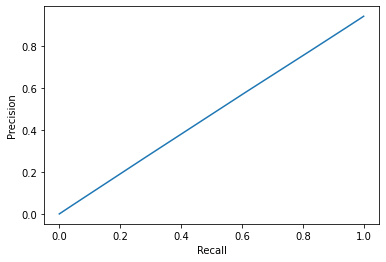

In [447]:
import collections 

DATA_PATH = os.path.join('../../', 'data/custom_data/')
OUTPUT_PATH = os.path.join('../../', 'output/')
all_val_files = data_utils.get_data_files(os.path.join(DATA_PATH, 'val.txt'))
epoch = 8
test_run = 'pedestrian2_aug'
mode = 'rcnn'

total_frames = len(all_val_files)

frame_no_dets = collections.defaultdict(list)
precision_list = np.zeros(9)
recall_list = np.zeros(9)
iou = 0.1
for i in range(8): 
    recall_iou = [] 
    ap_list = []
    for idx, frame in enumerate(all_val_files): 
        digit = idx_to_str(idx)
        lidar_file = os.path.join(DATA_PATH, frame)
        _, _, bboxes = data_utils.load_h5(lidar_file, bbox=True)

        bbox_list = np.reshape(bboxes, (1,-1)) 
        gt_boxes3d_list = [Object3d(box, gt=True) for box in bbox_list]
        gt_boxes3d_np = np.array([(obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry) for obj in gt_boxes3d_list])
        gt_boxes3d = torch.from_numpy(gt_boxes3d_np).contiguous().cuda(non_blocking=True).float()

        bboxes3d_path = os.path.join(OUTPUT_PATH, "{}/{}/eval/epoch_{}/val/final_result/data/00{}.txt".format(mode, test_run, epoch, digit))
        pred_boxes3d_list = get_objects_from_label(bboxes3d_path)
        pred_boxes3d_np = np.array([(obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry) for obj in pred_boxes3d_list])
        pred_boxes3d = torch.from_numpy(pred_boxes3d_np).contiguous().cuda(non_blocking=True).float()

        if pred_boxes3d.shape[0] == 0:
            frame_no_dets["{}: {}".format(idx,frame)].append(iou)
            recall = precision = 0.0
        else: 
            recall, precision = eval_detections(pred_boxes3d, gt_boxes3d, IOU_thresh=iou)
        ap_list.append(precision)
        recall_iou.append(recall)
    AP= np.mean(ap_list)
    recall = np.mean(recall_iou)
    print('IOU: {}, AP: {}, and Recall: {}'.format(iou, AP, recall))
    iou = np.round(iou+0.1, decimals=1) 
    precision_list[i] = AP
    recall_list[i] = recall
plt.plot(recall_list, precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

IoU = 0.3
Precision: 0.9848537005163511
Recall: 0.9634618622663748
Average Precision: 0.9618340782653334
IoU = 0.35
Precision: 0.9762478485370052
Recall: 0.9550429365212999
Average Precision: 0.9509122138486279
IoU = 0.4
Precision: 0.9542168674698795
Recall: 0.9334904866139081
Average Precision: 0.9215352047564587
IoU = 0.45
Precision: 0.9108433734939759
Recall: 0.8910591008587304
Average Precision: 0.8592627923799996
IoU = 0.5
Precision: 0.8588640275387264
Recall: 0.8402087893584779
Average Precision: 0.7801883371516545
IoU = 0.55
Precision: 0.7910499139414802
Recall: 0.7738676544872874
Average Precision: 0.6846120224194261
IoU = 0.6
Precision: 0.7025817555938038
Recall: 0.6873210978279172
Average Precision: 0.5567360163256988
IoU = 0.65
Precision: 0.5860585197934596
Recall: 0.5733288432396026
Average Precision: 0.398085675322601
IoU = 0.7
Precision: 0.4304647160068847
Recall: 0.4211146657686479
Average Precision: 0.22155638004040468
IoU = 0.75
Precision: 0.2685025817555938
Recall: 0.

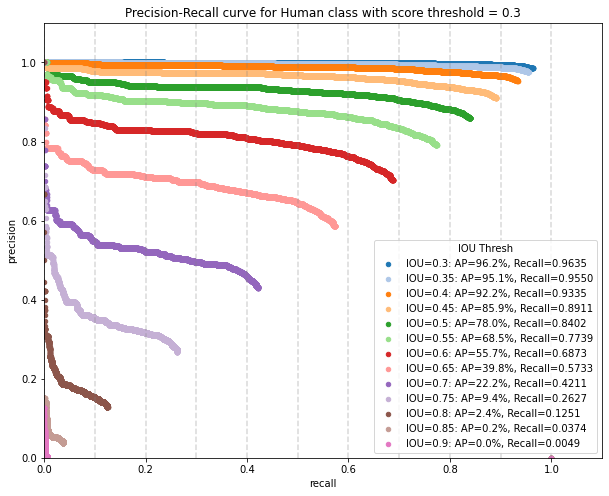

Frames without detections: 182


In [35]:
import collections 
import pandas as pd 

DATA_PATH = os.path.join('../../', 'data/custom_data/')
OUTPUT_PATH = os.path.join('../../', 'output/')
all_val_files = data_utils.get_data_files(os.path.join(DATA_PATH, 'val.txt'))
epoch = 28 # 8
# test_run = 'pedestrian2_aug'
test_run = 'pedestrian_aug_intensity_fix'
mode = 'rcnn'

total_frames = len(all_val_files)
iou_thresholds = np.arange(0.3, 0.9, 0.05)

COLORS = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
frame_no_dets = collections.defaultdict(list)
precision_list = np.zeros(9)
recall_list = np.zeros(9)
score_thresh = 0.3
ax = None
for i, iou in enumerate(iou_thresholds): 
    iou = np.round(iou, decimals=2) 
    print('IoU = {}'.format(iou))
    preds = np.empty([0,10])
    pred_ct = 0 
    total_gt_boxes = 0 
    no_dets_ct = 0 
    for idx, frame in enumerate(all_val_files): 
#         print(frame)
        digit = idx_to_str(idx)
        lidar_file = os.path.join(DATA_PATH, frame)
        _, _, bboxes = data_utils.load_h5(lidar_file, bbox=True)

        bbox_list = np.reshape(bboxes, (-1,bboxes.shape[-1])) 
        num_gt_boxes = len(bbox_list)
        total_gt_boxes += num_gt_boxes
        
        gt_boxes3d_list = [Object3d(box, gt=True) for box in bbox_list]
        gt_boxes3d_np = np.array([(obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry) for obj in gt_boxes3d_list])
#         gt_boxes3d_np = np.vstack((gt_boxes3d_np,gt_boxes3d_np))
        gt_boxes3d = torch.from_numpy(gt_boxes3d_np).contiguous().cuda(non_blocking=True).float()
        
        bboxes3d_path = os.path.join(OUTPUT_PATH, "{}/{}/eval/epoch_{}/val/final_result/data/00{}.txt".format(mode, test_run, epoch, digit))
        pred_boxes3d_list = get_objects_from_label(bboxes3d_path)
        pred_boxes3d_np = np.array([(obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry) for obj in pred_boxes3d_list])
        
        scores = np.array([obj.score for obj in pred_boxes3d_list])
        raw_scores = torch.from_numpy(scores).contiguous().cuda(non_blocking=True).float()
        norm_scores = torch.sigmoid(raw_scores).cpu().numpy()
        scores_sorted = np.sort(norm_scores)[::-1] # sort scores 
        scores_idx = np.argsort(norm_scores)[::-1] # keep track of original indices 
        filter_ids = np.where(scores_sorted > score_thresh)[0] # Remove boxes with scores lower than threshold scores
        scores_idx = scores_idx[filter_ids]
        pred_boxes3d_np = pred_boxes3d_np[scores_idx] # order predictions with descending score 
        pred_boxes3d = torch.from_numpy(pred_boxes3d_np).contiguous().cuda(non_blocking=True).float()
        num_preds = pred_boxes3d.shape[0]
        pred_ct += num_preds

        if num_preds == 0: 
            no_dets_ct +=1 
            continue 
        
        iou3d = iou3d_utils.boxes_iou3d_gpu(pred_boxes3d, gt_boxes3d)
        max_iou, gt_ind = iou3d.max(dim=1)
        assigned_gt_box_idx = []
        true_positive_mask = []
        for el in zip(max_iou,gt_ind): 
            if el[0].item() > iou and el[1].item() not in assigned_gt_box_idx: 
                true_positive_mask.append(1.0)
            else: 
                true_positive_mask.append(0.0)
            
        true_positive_mask = (max_iou > iou).float().cpu().numpy()
        preds_temp=np.hstack((pred_boxes3d_np, 
                              scores[scores_idx].reshape(num_preds,-1), 
                              true_positive_mask.reshape(num_preds,-1), 
                              gt_ind.cpu().numpy().reshape(num_preds,-1)))
        
        preds_temp = preds_temp[np.argsort(preds_temp[:, 7])[::-1]]
        # add predictions for current frame to all predictions in entire test set 
        preds = np.vstack((preds, preds_temp))
    # sort all detections by score 
    pred_final = preds[np.argsort(preds[:, 7])[::-1]]
    AP, cum_precisions, cum_recalls, precision, recall = compute_ap(pred_final[:, 8], total_gt_boxes, pred_ct)
    
    print('Precision: {}\nRecall: {}'.format(precision, recall))
    print('Average Precision: {}'.format(AP))
#     fig_name = "PRCurve_val_" + config['name']
    legend = "IOU={}: AP={:.1%}, Recall={:05.4f}".format(iou, AP, recall)
    ax = plot_pr_curve(cum_precisions, cum_recalls, score_thresh, label=legend, color=COLORS[i], ax=ax)

plt.legend(loc='lower right', title='IOU Thresh', frameon=True, fontsize='medium')
# plt.legend(loc='upper right', title='IOU Thresh', bbox_to_anchor=(1.45,1), borderaxespad=0,frameon=True, fontsize='medium')


for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
filename=os.path.join('../../plots/', 'pr_curve_scorethresh{}.pdf'.format(score_thresh))
plt.savefig(filename, bbox_inches="tight")
plt.show()
print('Frames without detections: {}'.format(no_dets_ct))

In [65]:
norm_scores = torch.sigmoid(raw_scores).cpu().numpy()
scores_sorted = np.sort(norm_scores)[::-1] # sort scores 
scores_idx = np.argsort(norm_scores)[::-1] # keep track of original indices 

print(scores_idx)

[0 1]


In [78]:
norm_scores_torch = torch.sigmoid(raw_scores)
print(norm_scores_torch.shape)
scores_idx = torch.argsort(norm_scores_torch, dim=0, descending=True)
scores_sorted,_ = torch.sort(norm_scores_torch, dim=0, descending=True)
print(scores_sorted)

print(scores_idx)

filter_ids = torch.where(scores_sorted > score_thresh)
print(filter_ids)

scores_idx = scores_idx[filter_ids]

torch.Size([2])
tensor([0.9580, 0.4994], device='cuda:0')
tensor([0, 1], device='cuda:0')
(tensor([0, 1], device='cuda:0'),)


In [34]:
# def plot_pr_curve(precisions, recalls, legend, name='PRCurve'):
#     # fig_name = "PRCurve_train_" + config['name']
#     # legend = "AP={:.1%} @IOU=0.5".format(train_metrics['AP'])
#     fig, ax = plt.subplots()
#     ax.plot(recalls, precisions, ".")
#     ax.set_title("Precision Recall Curve")
#     ax.set_xlabel("Recall")
#     ax.set_ylabel("Precision")
#     ax.legend([legend], loc='upper right')
#     plt.show()    
#     return fig 
# #     path = os.path.join("Figures", name)
# #     fig.savefig(path)
# #     print("PR Curve saved at", path)

def plot_pr_curve(
    precisions, recalls, score_thresh, label=None, color=None, ax=None):
    """Simple plotting helper function"""

    if ax is None:
        plt.figure(figsize=(10,8))
        ax = plt.gca()

    if color is None:
        color = COLORS[0]
    ax.scatter(recalls, precisions, label=label, s=20, color=color)
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    title= 'Precision-Recall curve for Human class with score threshold = {}'.format(score_thresh)
    ax.set_title(title)
    ax.set_xlim([0.0,1.1])
    ax.set_ylim([0.0,1.1])
    return ax

In [33]:
def compute_ap(tp_list, num_gt, num_pred):

    assert num_gt != 0
    assert num_pred != 0
    tp = tp_list.sum()
    # Compute precision and recall at each prediction box step
    cum_precisions = np.cumsum(tp_list) / (np.arange(num_pred) + 1)
    cum_recalls = np.cumsum(tp_list).astype(np.float32) / num_gt
    
    # Pad with start and end values to simplify the math
    cum_precisions = np.concatenate([[0], cum_precisions, [0]])
    cum_recalls = np.concatenate([[0], cum_recalls, [1]])

    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(cum_precisions) - 2, -1, -1):
        cum_precisions[i] = np.maximum(cum_precisions[i], cum_precisions[i + 1])

    # Compute AP 
    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    indices = np.where(cum_recalls[:-1] != cum_recalls[1:])[0] + 1
    AP = np.sum((cum_recalls[indices] - cum_recalls[indices - 1]) *
                 cum_precisions[indices])
    precision = tp / num_pred
    recall = tp / num_gt
    return AP, cum_precisions, cum_recalls, precision, recall

def compute_matches(gt_boxes,
                    pred_boxes, pred_scores,
                    iou_threshold=0.5, score_threshold=0.0):
    """Finds matches between prediction and ground truth instances.
    Returns:
        gt_match: 1-D array. For each GT box it has the index of the matched
                  predicted box.
        pred_match: 1-D array. For each predicted box, it has the index of
                    the matched ground truth box.
        overlaps: [pred_boxes, gt_boxes] IoU overlaps.
    """

    if len(pred_scores) == 0:
        return -1 * np.ones([gt_boxes.shape[0]]), np.array([]), np.array([])

    gt_class_ids = np.ones(len(gt_boxes), dtype=int)
    pred_class_ids = np.ones(len(pred_scores), dtype=int)

    # Sort predictions by score from high to low
    indices = np.argsort(pred_scores)[::-1]
    pred_boxes = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores = pred_scores[indices]

    # Compute IoU overlaps [pred_boxes, gt_boxes]
    pred_boxes3d = torch.from_numpy(pred_boxes).contiguous().cuda(non_blocking=True).float()
    gt_boxes3d = torch.from_numpy(gt_boxes).contiguous().cuda(non_blocking=True).float()
    iou3d = iou3d_utils.boxes_iou3d_gpu(pred_boxes3d, gt_boxes3d)
    overlaps = iou3d.cpu().numpy()

    # Loop through predictions and find matching ground truth boxes
    match_count = 0
    pred_match = -1 * np.ones([pred_boxes.shape[0]])
    gt_match = -1 * np.ones([gt_boxes.shape[0]])
    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        # 1. Sort matches by score
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        # 2. Remove low scores
        low_score_idx = np.where(overlaps[i, sorted_ixs] < score_threshold)[0]
        if low_score_idx.size > 0:
            sorted_ixs = sorted_ixs[:low_score_idx[0]]
        # 3. Find the match
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] > 0:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            if iou < iou_threshold:
                break
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count += 1
                gt_match[j] = i
                pred_match[i] = j
                break

    return gt_match, pred_match, overlaps

In [551]:
test2 = test.sort_values(7, axis=0, ascending=False)

In [552]:
test2

,0,1,2,3,4,5,6,7,8,9
6373,0.7282,-0.6073,3.1632,0.9298,0.4822,0.7483,-2.3898,5.2153,1.0,0.0
2528,0.4953,-0.7095,4.2380,1.2906,0.5380,0.7890,-2.3199,5.0391,1.0,0.0
6319,0.3520,-0.5926,3.2305,1.0199,0.4457,0.7102,-2.3849,4.9451,0.0,0.0
6277,-1.1135,-0.5068,2.3140,0.9792,0.4222,0.7021,-2.3810,4.9272,1.0,0.0
6100,0.3697,-0.4974,2.2214,0.8674,0.5014,0.7182,-2.3924,4.9232,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3389,-6.2911,-0.7161,2.1677,1.6806,1.2181,0.9507,-0.8161,-0.9209,1.0,0.0
4203,-6.3950,-0.4685,4.0305,1.6435,0.5927,0.4615,0.8218,-1.0726,1.0,0.0
4621,-6.8391,-1.8712,4.7882,1.3953,0.4839,0.4332,-0.8220,-1.2342,0.0,0.0
4204,-6.5031,-1.4975,0.0287,1.2943,0.6966,0.6092,2.3135,-1.6668,0.0,0.0


In [553]:
pred_test = preds[np.argsort(preds[:, 7])[::-1]]

In [554]:
test3 = pd.DataFrame(pred_test)
test3

,0,1,2,3,4,5,6,7,8,9
0,0.7282,-0.6073,3.1632,0.9298,0.4822,0.7483,-2.3898,5.2153,1.0,0.0
1,0.4953,-0.7095,4.2380,1.2906,0.5380,0.7890,-2.3199,5.0391,1.0,0.0
2,0.3520,-0.5926,3.2305,1.0199,0.4457,0.7102,-2.3849,4.9451,0.0,0.0
3,-1.1135,-0.5068,2.3140,0.9792,0.4222,0.7021,-2.3810,4.9272,1.0,0.0
4,0.3697,-0.4974,2.2214,0.8674,0.5014,0.7182,-2.3924,4.9232,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6652,-6.2911,-0.7161,2.1677,1.6806,1.2181,0.9507,-0.8161,-0.9209,1.0,0.0
6653,-6.3950,-0.4685,4.0305,1.6435,0.5927,0.4615,0.8218,-1.0726,1.0,0.0
6654,-6.8391,-1.8712,4.7882,1.3953,0.4839,0.4332,-0.8220,-1.2342,0.0,0.0
6655,-6.5031,-1.4975,0.0287,1.2943,0.6966,0.6092,2.3135,-1.6668,0.0,0.0


In [511]:
# preds=np.hstack((pred_boxes3d_np, scores, true_positive_mask, gt_ind.cpu().numpy()))
print(pred_boxes3d_np.shape)
print(scores.shape)
print(true_positive_mask.shape)
print(gt_ind.cpu().numpy().shape)

(1, 7)
(1,)
(1,)
(1,)


In [515]:
np.append(pred_boxes3d_np, scores.reshape(-1,1), axis=1)

array([[-0.54250002, -0.65200001,  4.34730005,  1.2275    ,  0.3787    ,
         0.5591    , -2.3196    ,  1.9682    ]])

In [509]:
x = np.vstack((pred_boxes3d_np, pred_boxes3d_np))
print(x.shape)
x.reshape(-1).shape

(2, 7)


(14,)

In [514]:
x = np.array([[10,20,30], [40,50,60]])
print(x.shape)
y = np.array([[100], [200]])
print(y.shape)
print(np.append(x, y, axis=1))

(2, 3)
(2, 1)
[[ 10  20  30 100]
 [ 40  50  60 200]]


# Test Data Augmentation

In [325]:
GT_AUG_HARD_RATIO=0.6
GT_AUG_RAND_NUM=True
GT_EXTRA_NUM=15

In [326]:
def apply_gt_aug_to_one_scene(gt_database, sample_id, pts_rect, pts_intensity, all_gt_boxes3d):
    """
    :param pts_rect: (N, 3)
    :param all_gt_boxex3d: (M2, 7)
    :return:
    """
    # extra_gt_num = np.random.randint(10, 15)
    # try_times = 50
    if GT_AUG_RAND_NUM:
        extra_gt_num = np.random.randint(10, GT_EXTRA_NUM)
    else:
        extra_gt_num = GT_EXTRA_NUM
    try_times = 100
    cnt = 0
    cur_gt_boxes3d = all_gt_boxes3d.copy()
    cur_gt_boxes3d[:, 4] += 0.5  # TODO: consider different objects
    cur_gt_boxes3d[:, 5] += 0.5  # enlarge new added box to avoid too nearby boxes
    cur_gt_corners = kitti_utils.boxes3d_to_corners3d(cur_gt_boxes3d)

    extra_gt_obj_list = []
    extra_gt_boxes3d_list = []
    new_pts_list, new_pts_intensity_list = [], []
    src_pts_flag = np.ones(pts_rect.shape[0], dtype=np.int32)

    while try_times > 0:
        if cnt > extra_gt_num:
            break
        try_times -= 1
        if GT_AUG_HARD_RATIO > 0:
            p = np.random.rand()
            if p > GT_AUG_HARD_RATIO:
                # use easy sample
                rand_idx = np.random.randint(0, len(gt_database[0]))
                new_gt_dict = gt_database[0][rand_idx]
            else:
                # use hard sample
                rand_idx = np.random.randint(0, len(gt_database[1]))
                new_gt_dict = gt_database[1][rand_idx]
        else:
            rand_idx = np.random.randint(0, gt_database.__len__())
            new_gt_dict = gt_database[rand_idx]

        new_gt_box3d = new_gt_dict['gt_box3d'].copy()
        new_gt_points = new_gt_dict['points'].copy()
        new_gt_intensity = new_gt_dict['intensity'].copy()
        new_gt_obj = new_gt_dict['obj']
        new_sample_id = new_gt_dict['sample_id']
        center = new_gt_box3d[0:3]

        # if cfg.PC_REDUCE_BY_RANGE and (self.check_pc_range(center) is False):
        #     continue

        if new_gt_points.__len__() < 5:  # too few points
            print('Count: {}, Try-Times: {} --> Discarding sample with only {} points'.format(cnt, try_times, new_gt_points.__len__()))
            continue

        # TODO: put it on the road plane? 
        # cur_height = (-d - a * center[0] - c * center[2]) / b
        # move_height = new_gt_box3d[1] - cur_height
        # new_gt_box3d[1] -= move_height
        # new_gt_points[:, 1] -= move_height
        # new_gt_obj.pos[1] -= move_height

        new_enlarged_box3d = new_gt_box3d.copy()
        new_enlarged_box3d[4] += 0.5
        new_enlarged_box3d[5] += 0.5  # enlarge new added box to avoid too nearby boxes

        cnt += 1
        new_corners = kitti_utils.boxes3d_to_corners3d(new_enlarged_box3d.reshape(1, 7))
        iou3d = kitti_utils.get_iou3d(new_corners, cur_gt_corners)
        if not iou3d.max() < 1e-8: 
            print('Count: {}, Try-Times: {} --> Collision with ground truth'.format(cnt, try_times))
            # collision with ground truth 
            continue

        enlarged_box3d = new_gt_box3d.copy()
        enlarged_box3d[3] += 2  # remove the points above and below the object

        boxes_pts_mask_list = roipool3d_utils.pts_in_boxes3d_cpu(
            torch.from_numpy(pts_rect), torch.from_numpy(enlarged_box3d.reshape(1, 7)))
        pt_mask_flag = (boxes_pts_mask_list[0].numpy() == 1)
        src_pts_flag[pt_mask_flag] = 0  # remove the original points which are inside the new box

        new_pts_list.append(new_gt_points)
        new_pts_intensity_list.append(new_gt_intensity)
        cur_gt_boxes3d = np.concatenate((cur_gt_boxes3d, new_enlarged_box3d.reshape(1, 7)), axis=0)
        cur_gt_corners = np.concatenate((cur_gt_corners, new_corners), axis=0)
        extra_gt_boxes3d_list.append(new_gt_box3d.reshape(1, 7))
        extra_gt_obj_list.append((new_sample_id, new_gt_obj))

    if new_pts_list.__len__() == 0:
        return False, pts_rect, pts_intensity, None, None

    extra_gt_boxes3d = np.concatenate(extra_gt_boxes3d_list, axis=0)
    # remove original points and add new points
    pts_rect = pts_rect[src_pts_flag == 1]
    pts_intensity = pts_intensity[src_pts_flag == 1]
    new_pts_rect = np.concatenate(new_pts_list, axis=0)
    new_pts_intensity = np.concatenate(new_pts_intensity_list, axis=0)
    pts_rect = np.concatenate((pts_rect, new_pts_rect), axis=0)
    pts_intensity = np.concatenate((pts_intensity, new_pts_intensity), axis=0)

    return True, pts_rect, pts_intensity, extra_gt_boxes3d, extra_gt_obj_list

In [327]:
gt_database_dir = os.path.join('../','gt_database/train_gt_database_3level_Pedestrian.pkl')

In [328]:
import pickle
gt_database_raw = pickle.load(open(gt_database_dir, 'rb'))
easy_list, hard_list = [], []
for k in range(gt_database_raw.__len__()):
    obj = gt_database_raw[k]
    if obj['points'].shape[0] > 100:
        easy_list.append(obj)
    else:
        hard_list.append(obj)
gt_database = [easy_list, hard_list]

In [329]:
print(len(gt_database_raw))

5939


In [330]:
sample_id = 100
DATA_PATH = os.path.join('../../', 'data/custom_data/')
all_train_files = data_utils.get_data_files(os.path.join(DATA_PATH, 'train.txt'))
lidar_file = os.path.join(DATA_PATH, all_train_files[sample_id])
pts_lidar, _, bboxes = data_utils.load_h5(lidar_file, bbox=True)
pts_rect = data_utils.pts_lidar_to_camera(pts_lidar[:, :3])
pts_intensity = pts_lidar[:, 3]
bbox_list = np.reshape(bboxes, (1,-1)) 
gt_boxes3d_list = [Object3d(box, gt=True) for box in bbox_list]
all_gt_boxes3d = np.array([(obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry) for obj in gt_boxes3d_list])

gt_aug_flag, pts_rect, pts_intensity, extra_gt_boxes3d, extra_gt_obj_list = apply_gt_aug_to_one_scene(gt_database, sample_id, pts_rect, pts_intensity, all_gt_boxes3d)


Count: 8, Try-Times: 92 --> Collision with ground truth
Count: 10, Try-Times: 90 --> Collision with ground truth
Count: 12, Try-Times: 88 --> Collision with ground truth
Count: 13, Try-Times: 87 --> Collision with ground truth
Count: 15, Try-Times: 85 --> Collision with ground truth


In [331]:
gt_boxes3d_list.extend(extra_gt_obj_list)
bboxes3d = []
fig = show_lidar_with_boxes(pts_rect, bboxes3d, gt_objects=gt_boxes3d_list)

('All point num: ', 9772)
Got 0 detections
Got 11 ground truth objects


In [332]:
fig

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…

In [261]:
name = 'gt_aug_new_trainID_{}'.format(sample_id)
mlab.savefig(filename=os.path.join('../../','plots/{}.png'.format(name)))

# Show ground truth only

In [192]:
frame = 'walk_person166_3/frame430.h5'
DATA_PATH = os.path.join('../../', 'data/custom_data/')
lidar_file = os.path.join(DATA_PATH, frame)
pts_lidar, _, bboxes = data_utils.load_h5(lidar_file, bbox=True)
pts_rect = data_utils.pts_lidar_to_camera(pts_lidar[:, :3])
pts_intensity = pts_lidar[:, 3]
bbox_list = np.reshape(bboxes, (1,-1)) 
gt_boxes3d_list = [Object3d(box, gt=True) for box in bbox_list]
# gt_boxes = np.array([(obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry) for obj in gt_boxes3d_list])
gt_fig = show_lidar_with_boxes(pts_rect, [], gt_objects=gt_boxes3d_list)

('All point num: ', 8660)
Got 0 detections
Got 1 ground truth objects


In [193]:
gt_fig

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…

In [165]:
gt_fig2

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…